In [2]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(column):
    value_counts = column.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Overall entropy
overall_entropy = entropy(df['buys_computer'])

# Calculate information gain for each feature
def information_gain(feature):
    weighted_entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset['buys_computer'])
    return overall_entropy - weighted_entropy

# Features to evaluate
features = ['age', 'income', 'student', 'credit_rating']
info_gains = {feature: information_gain(feature) for feature in features}

# Display information gain for each feature
print("Information Gain for each feature:")
for feature, gain in info_gains.items():
    print(f"{feature}: {gain:.3f}")

# Find the feature with the highest information gain
best_feature = max(info_gains, key=info_gains.get)
print(f"\nBest feature to split on: {best_feature}")


Information Gain for each feature:
age: 0.060
income: 0.060
student: 0.128
credit_rating: 0.128

Best feature to split on: student


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Sample data
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['age', 'income', 'student', 'credit_rating'], drop_first=True)

# Features and target variable
X = df_encoded.drop('buys_computer', axis=1)
y = df_encoded['buys_computer'].map({'no': 0, 'yes': 1})  # Convert to binary

# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Training set accuracy
accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {accuracy:.3f}")

# Print the depth of the tree
tree_depth = model.get_depth()
print(f"Depth of the constructed tree: {tree_depth}")


Training Set Accuracy: 1.000
Depth of the constructed tree: 5


Training Set Accuracy: 1.000
Depth of the constructed tree: 4


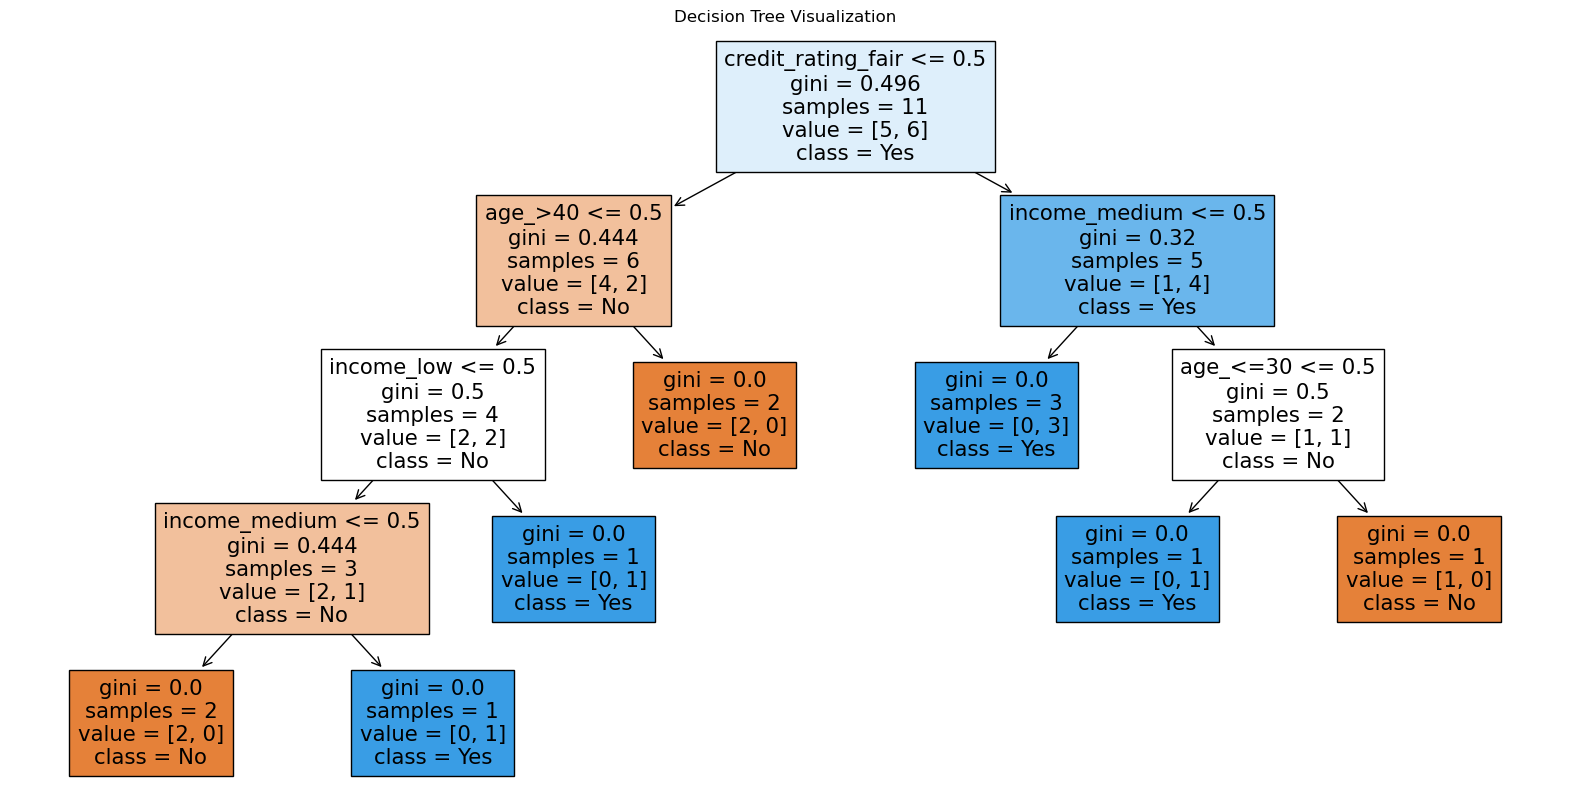

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample data
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['age', 'income', 'student', 'credit_rating'], drop_first=True)

# Features and target variable
X = df_encoded.drop('buys_computer', axis=1)
y = df_encoded['buys_computer'].map({'no': 0, 'yes': 1})  # Convert to binary

# Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Training set accuracy
accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {accuracy:.3f}")

# Print the depth of the tree
tree_depth = model.get_depth()
print(f"Depth of the constructed tree: {tree_depth}")

# Visualize the constructed tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()
